# Exercise 4 Neural Network Learning

In this exercise, we will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition.

## Initialize Parameters

Setup the parameters for this exercise:

In [1]:
input_layer_size = 400   # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data

There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit.

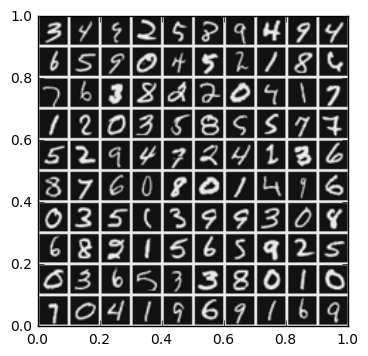

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from display_data import display_data


# Load Training Data
mat_data = sio.loadmat('ex4data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
m, n = X.shape

# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
plt.figure()
display_data(X[rand_indices[0:100], :], padding=1)
plt.show()

## Part 2: Loading Parameters

Load the pre-initialized neural network parameters and unroll them into a 1-D vector:

In [3]:
mat_param = sio.loadmat('ex4weights.mat')
theta_1 = mat_param['Theta1']
theta_2 = mat_param['Theta2']
# Unroll parameters
params_trained = np.hstack((theta_1.flatten(), theta_2.flatten()))

## Part 3: Compute Cost (Feedforward)

The `nn_cost_function()` implements the neural network cost function for a two layer neural network which performs classification.

In [4]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, l):
    """
    Implements the neural network cost function for a two layer neural network which performs classification.

    Parameters
    ----------
    nn_params : ndarray, shape (n_params,)
        Parameters for the neural network, "unrolled" into a vector.
    input_layer_size : int
        The size of the input layer.
    hidden_layer_size : int
        The size of the hidden layer.
    num_labels : int
        The number of labels.
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    l : float
        Regularization parameter.

    Returns
    -------
    j : numpy.float64
        The cost of the neural network w.r.t. the parameters.
    grad: ndarray, shape (n_params,)
        The gradient of the neural network w.r.t. the parameters.
    """
    Theta_1 = np.reshape(nn_params[0:(hidden_layer_size * (input_layer_size + 1)), ],
                         (hidden_layer_size, input_layer_size + 1))
    Theta_2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):, ],
                         (num_labels, hidden_layer_size + 1))

    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))

    Z_2 = X.dot(Theta_1.T)
    A_2 = sigmoid(Z_2)
    A_2 = np.hstack((np.ones((m, 1)), A_2))

    Z_3 = A_2.dot(Theta_2.T)
    A_3 = sigmoid(Z_3)

    Y = np.zeros((m, num_labels))
    for i in range(m):
        Y[i, y[i] - 1] = 1

    j = 0.0
    for i in range(m):
        j += np.log(A_3[i, ]).dot(-Y[i, ].T) - np.log(1 - A_3[i, ]).dot(1 - Y[i, ].T)
    j /= m

    Theta_1_square = np.square(Theta_1[:, 1:])
    Theta_2_square = np.square(Theta_2[:, 1:])
    reg = 1.0 * l / (2 * m) * (np.sum(Theta_1_square) + np.sum(Theta_2_square))
    j += reg

    d_3 = A_3 - Y
    D_2 = d_3.T.dot(A_2)

    Z_2 = np.hstack((np.ones((m, 1)), Z_2))
    d_2 = d_3.dot(Theta_2) * sigmoid_gradient(Z_2)
    d_2 = d_2[:, 1:]
    D_1 = d_2.T.dot(X)

    Theta_1_grad = 1.0 * D_1 / m
    Theta_1_grad[:, 1:] = Theta_1_grad[:, 1:] + 1.0 * l / m * Theta_1[:, 1:]

    Theta_2_grad = 1.0 * D_2 / m
    Theta_2_grad[:, 1:] = Theta_2_grad[:, 1:] + 1.0 * l / m * Theta_2[:, 1:]

    grad = np.hstack((Theta_1_grad.ravel(), Theta_2_grad.ravel()))

    return j, grad


def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array_like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g


def sigmoid_gradient(z):
    """
    Computes the gradient of the sigmoid function evaluated at z

    Parameters
    ----------
    z : array_like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The gradient of the sigmoid of each value of z.
    """
    g = sigmoid(z) * (1 - sigmoid(z))
    return g


Compute the cost at the parameters loaded from `ex4weights.mat`:

In [5]:
l = 0.0
j, _ = nn_cost_function(params_trained, input_layer_size, hidden_layer_size, num_labels, X, y, l)
print 'Cost at parameters (loaded from ex4weights):', j, '(this value should be about 0.287629)'

Cost at parameters (loaded from ex4weights): 0.287629165161 (this value should be about 0.287629)


## Part 4: Implement Regularization

Compute the cost at the parameters loaded from `ex4weights.mat` with regularization parameter set to 1.0: 

In [6]:
l = 1.0
j, _ = nn_cost_function(params_trained, input_layer_size, hidden_layer_size, num_labels, X, y, l)
print 'Cost at parameters (loaded from ex4weights):', j, '(this value should be about 0.383770)'

Cost at parameters (loaded from ex4weights): 0.383769859091 (this value should be about 0.383770)


## Part 5: Sigmoid Gradient

The `sigmoid_gradient()` as we've seen in `nn_cost_function` computes the gradient of the sigmoid function.

Evaluating sigmoid gradient:

In [7]:
g = sigmoid_gradient(np.array([-1, -0.5, 0, 0.5, 1]))
print 'Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:'
print g

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]


## Part 6: Initializing Parameters

The `rand_initialize_weights()` randomly initialize the weights of a layer.

In [8]:
def rand_initialize_weights(l_in, l_out):
    """
    Randomly initialize the weights of a layer with l_in incoming connections and l_out outgoing connections.

    Parameters
    ----------
    l_in : int
        Number of incoming connections.
    l_out : int
        Number of outgoing connections.

    Returns
    -------
    ndarray
        The randomly initialized weight.
    """
    epsilon_init = 0.12

    # Note that w should be set to a matrix of size(l_out, 1 + l_in) as the first column of W handles the "bias" terms
    W = np.random.rand(l_out, 1 + l_in) * 2 * epsilon_init - epsilon_init

    return W


Randomly initializing neural network parameters:

In [9]:
initial_theta_1 = rand_initialize_weights(input_layer_size, hidden_layer_size)
initial_theta_2 = rand_initialize_weights(hidden_layer_size, num_labels)
initial_nn_params = np.hstack((initial_theta_1.ravel(), initial_theta_2.ravel()))

## Part 7: Implement Regularization

Check backpropagation with regularization parameter set to 3.0:

In [10]:
l = 3.0
debug_j, _ = nn_cost_function(params_trained, input_layer_size, hidden_layer_size, num_labels, X, y, l)
print 'Cost at (fixed) debugging parameters (w/ lambda = {}): {}'.format(l, debug_j)
print '(for lambda = 3, this value should be about 0.576051)'

Cost at (fixed) debugging parameters (w/ lambda = 3.0): 0.57605124695
(for lambda = 3, this value should be about 0.576051)


## Part 8: Training NN

With `nn_cost_function()` and randomly initialized parameters, we can train the neural network.

In [11]:
import scipy.optimize as opt


result = opt.minimize(fun=nn_cost_function, x0=initial_nn_params,
                      args=(input_layer_size, hidden_layer_size, num_labels, X, y, l),
                      method='TNC', jac=True, options={'maxiter': 150})
params_trained = result.x
Theta_1_trained = np.reshape(params_trained[0:(hidden_layer_size * (input_layer_size + 1)), ],
                             (hidden_layer_size, input_layer_size + 1))
Theta_2_trained = np.reshape(params_trained[(hidden_layer_size * (input_layer_size + 1)):, ],
                             (num_labels, hidden_layer_size + 1))

## Part 9: Visualize Weights

Visualizing the neural network:

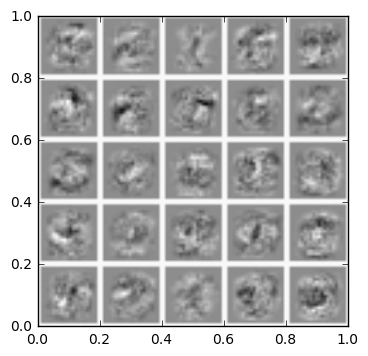

In [12]:
plt.figure()
display_data(Theta_1_trained[:, 1:], padding=1)
plt.show()

## Part 10: Implement Predict

The `predict()` predicts the label of an input given a trained neural network.

In [13]:
def predict(Theta_1, Theta_2, X):
    """
    Predicts the label of an input given a trained neural network.

    Parameters
    ----------
    Theta_1 : ndarray
        Trained weights of layer 1 of the neural network.
    Theta_2 : ndarray
        Trained weights of layer 2 of the neural network.
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    p : ndarray, shape (n_samples,)
         The prediction for x.
    """

    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    A_2 = sigmoid(X.dot(Theta_1.T))
    A_2 = np.hstack((np.ones((m, 1)), A_2))
    A_3 = sigmoid(A_2.dot(Theta_2.T))

    p = np.argmax(A_3, axis=1)
    p += 1  # The theta_1 and theta_2 are loaded from Matlab data, in which the matrix index starts from 1.

    return p


In [14]:
pred = predict(Theta_1_trained, Theta_2_trained, X)
print 'Training Set Accuracy:', np.mean(pred == y) * 100

Training Set Accuracy: 97.28
